# ML Homework2 Question 4

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_absolute_error
from math import pi

In [48]:
x = np.arange(-10 , 10 , 0.2)
x

array([-1.00000000e+01, -9.80000000e+00, -9.60000000e+00, -9.40000000e+00,
       -9.20000000e+00, -9.00000000e+00, -8.80000000e+00, -8.60000000e+00,
       -8.40000000e+00, -8.20000000e+00, -8.00000000e+00, -7.80000000e+00,
       -7.60000000e+00, -7.40000000e+00, -7.20000000e+00, -7.00000000e+00,
       -6.80000000e+00, -6.60000000e+00, -6.40000000e+00, -6.20000000e+00,
       -6.00000000e+00, -5.80000000e+00, -5.60000000e+00, -5.40000000e+00,
       -5.20000000e+00, -5.00000000e+00, -4.80000000e+00, -4.60000000e+00,
       -4.40000000e+00, -4.20000000e+00, -4.00000000e+00, -3.80000000e+00,
       -3.60000000e+00, -3.40000000e+00, -3.20000000e+00, -3.00000000e+00,
       -2.80000000e+00, -2.60000000e+00, -2.40000000e+00, -2.20000000e+00,
       -2.00000000e+00, -1.80000000e+00, -1.60000000e+00, -1.40000000e+00,
       -1.20000000e+00, -1.00000000e+00, -8.00000000e-01, -6.00000000e-01,
       -4.00000000e-01, -2.00000000e-01, -3.55271368e-14,  2.00000000e-01,
        4.00000000e-01,  

In [49]:
y = 2 *np.cos(x)/-pi + 2 *np.sin(2 * x)/(2 * pi) + 2 * np.cos(3 * x)/(-3 * pi)
y

array([ 0.21083685,  0.46662294,  0.70114778,  0.86381263,  0.92469071,
        0.88108399,  0.75495633,  0.58271702,  0.401384  ,  0.23622977,
        0.09425709, -0.03443238, -0.16828995, -0.32250105, -0.49848789,
       -0.67903744, -0.83127391, -0.91676003, -0.90528177, -0.78733785,
       -0.58059048, -0.32748979, -0.08429959,  0.09521672,  0.17620942,
        0.15379312,  0.05492131, -0.06975064, -0.16154463, -0.17200415,
       -0.07787143,  0.11194593,  0.3594999 ,  0.60977356,  0.80739268,
        0.91253736,  0.91097226,  0.81527498,  0.6574323 ,  0.47591018,
        0.30207056,  0.15081397,  0.0186022 , -0.11079791, -0.25539267,
       -0.42332256, -0.60523162, -0.77388844, -0.89160188, -0.92302713,
       -0.84882636, -0.67511571, -0.43491881, -0.18053393,  0.0311167 ,
        0.15555416,  0.17462054,  0.10246217, -0.01855993, -0.1309033 ,
       -0.17972487, -0.12989852,  0.02325422,  0.25285028,  0.50909544,
        0.73465593,  0.88159021,  0.92433589,  0.86476455,  0.72

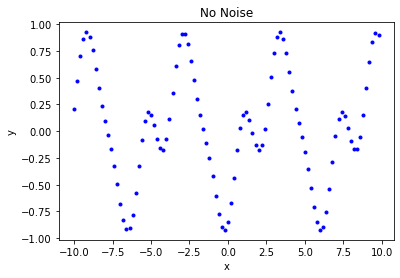

In [50]:
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.title('No Noise')
plt.show()

In [51]:
mu, sigma = 0 , 1
y_noisy_norm = y +0.12* np.random.normal(mu,sigma , len(y))
y_noisy_norm

array([ 0.20839739,  0.69792706,  0.72134187,  0.84388415,  0.88547342,
        0.75220121,  0.94421831,  0.44980339,  0.29485707,  0.09016188,
        0.3724248 , -0.07912085, -0.2148893 , -0.35856429, -0.4506727 ,
       -0.61370809, -0.957706  , -0.92508401, -0.7357307 , -0.71153117,
       -0.58545313, -0.24540885, -0.18850664,  0.18292738,  0.07653486,
        0.18946351, -0.05720481, -0.21394033, -0.11131093, -0.25784103,
       -0.1140083 ,  0.04498145,  0.47646457,  0.56537038,  0.84303226,
        0.794523  ,  1.13585511,  0.70804801,  0.69157573,  0.52485032,
        0.49809861, -0.01946442,  0.22405394, -0.00778279, -0.37417883,
       -0.5889226 , -0.48677143, -0.94734572, -1.08789766, -0.97760557,
       -0.95753347, -0.6143522 , -0.56521567, -0.209354  ,  0.16057782,
        0.19222199,  0.28583833,  0.11766591,  0.00635994, -0.14841309,
       -0.19732186, -0.24199384, -0.15576421,  0.21712983,  0.49122995,
        0.82793823,  0.66746473,  0.9570809 ,  0.81705969,  0.66

In [52]:
lam =2;
y_noisy_poiss = y +0.12*np.random.poisson(lam, len(y))
y_noisy_poiss

array([ 0.57083685,  0.58662294,  0.94114778,  0.98381263,  0.92469071,
        1.48108399,  0.75495633,  0.70271702,  0.521384  ,  0.47622977,
        0.21425709,  0.08556762, -0.04828995,  0.03749895, -0.37848789,
       -0.31903744, -0.35127391, -0.79676003, -0.90528177, -0.42733785,
       -0.22059048, -0.08748979,  0.27570041,  0.33521672,  0.53620942,
        0.63379312,  0.41492131,  0.41024936,  0.07845537,  0.06799585,
       -0.07787143,  0.23194593,  0.4794999 ,  0.60977356,  1.16739268,
        1.27253736,  1.39097226,  0.93527498,  0.7774323 ,  0.71591018,
        0.66207056,  0.39081397,  0.0186022 ,  0.24920209,  0.22460733,
       -0.06332256, -0.48523162, -0.41388844, -0.53160188, -0.68302713,
       -0.60882636, -0.43511571,  0.04508119, -0.06053393,  0.2711167 ,
        0.39555416,  0.53462054,  0.22246217,  0.22144007,  0.3490967 ,
       -0.05972487, -0.00989852,  0.26325422,  0.61285028,  0.62909544,
        1.33465593,  0.88159021,  1.16433589,  0.86476455,  0.96

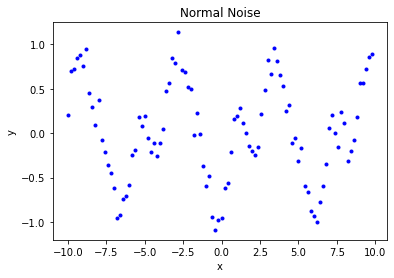

In [53]:
plt.plot(x,y_noisy_norm,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Normal Noise')
plt.show()

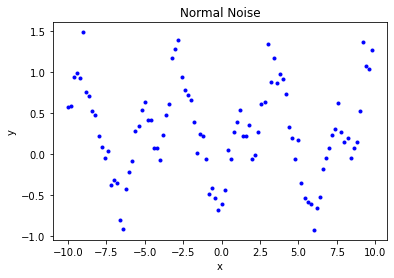

In [54]:
plt.plot(x,y_noisy_poiss,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Normal Noise')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
def polynomial_reg(x,y,degree=1):
    poly_features = PolynomialFeatures(degree = degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("polynomial_features", poly_features),
            ("std_scaler", std_scaler),
            ("linear_reg", lin_reg),
        ])
    
    polynomial_regression.fit(x.reshape(-1,1), y)
    y_pred = polynomial_regression.predict(x.reshape(-1,1))
    
    x_polynomial = poly_features.fit_transform(x.reshape(-1,1))
    
    X_new = np.linspace(-10, 10, 100).reshape(100, 1)
    y_new = polynomial_regression.predict(X_new)
    
    mse = mean_squared_error(y, y_pred) 
    mae = mean_absolute_error(y, y_pred)
          
    plt.plot(x, y, "b.")
    plt.plot(X_new, y_new, "g-", linewidth=2, label="Degree= " + str(degree ))
    plt.axis([-10 ,10,-3,3])
    plt.show()

    print('MSE with degree '+ str(degree) + ' = ' + str(mse) )
    print('MAE with degree '+ str(degree) + ' = ' + str(mae) )
    
    X_train, X_test, y_train, y_test = train_test_split(x_polynomial, y, test_size=0.2, random_state=1)
    mse_test, bias, var = bias_variance_decomp(lin_reg, X_train, y_train, X_test, y_test, loss='mse', num_rounds=100, random_seed=1)
    sheet = pd.DataFrame([mse_test, bias, var], index=["MSE", "Bias", "Varians"])
    print(sheet)
    return X_new, y_new

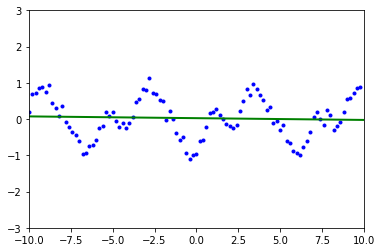

MSE with degree 1 = 0.3050814870223963
MAE with degree 1 = 0.45594306271889173
                0
MSE      0.431334
Bias     0.424888
Varians  0.006446


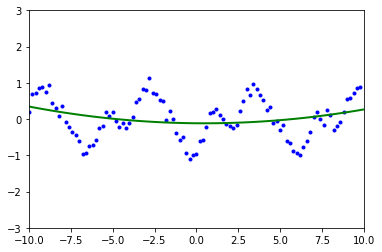

MSE with degree 2 = 0.2893050268297856
MAE with degree 2 = 0.440884580547038
                0
MSE      0.506741
Bias     0.500152
Varians  0.006590


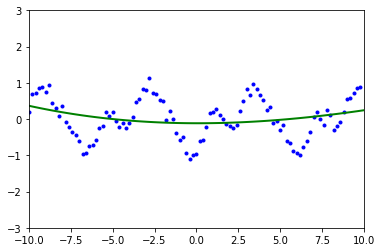

MSE with degree 3 = 0.28923815767465055
MAE with degree 3 = 0.44108869364938547
                0
MSE      0.527487
Bias     0.517862
Varians  0.009625


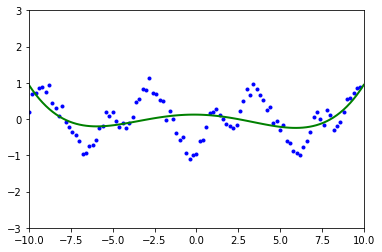

MSE with degree 4 = 0.2445383793252695
MAE with degree 4 = 0.3894819188025512
                0
MSE      0.420263
Bias     0.409389
Varians  0.010874


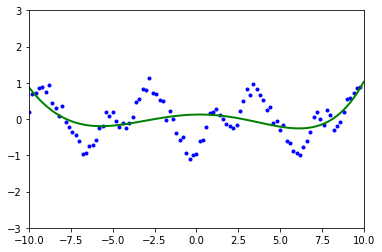

MSE with degree 5 = 0.2440501033184389
MAE with degree 5 = 0.3881750897795818
                0
MSE      0.423791
Bias     0.409508
Varians  0.014284


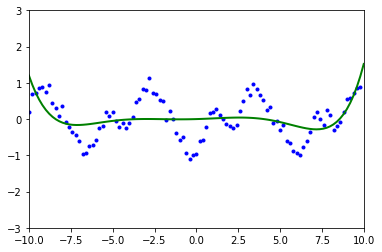

MSE with degree 6 = 0.23182909735190235
MAE with degree 6 = 0.38642383675950354
                0
MSE      0.393664
Bias     0.378193
Varians  0.015471


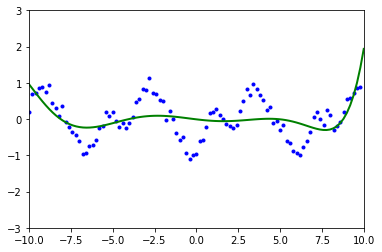

MSE with degree 7 = 0.22525604720870465
MAE with degree 7 = 0.38121682877517893
                0
MSE      0.407637
Bias     0.386991
Varians  0.020646


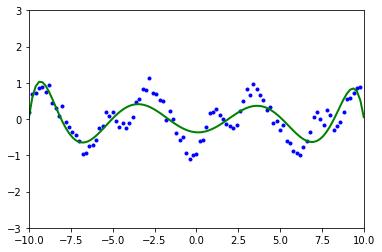

MSE with degree 8 = 0.12379153914898272
MAE with degree 8 = 0.29800323838854703
                0
MSE      0.209794
Bias     0.189503
Varians  0.020291


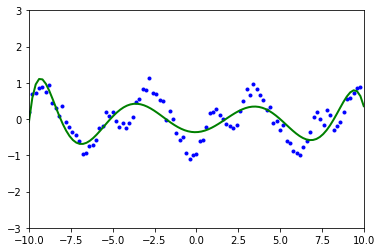

MSE with degree 9 = 0.12182242954928708
MAE with degree 9 = 0.29569252472308905
                0
MSE      0.210612
Bias     0.186515
Varians  0.024097


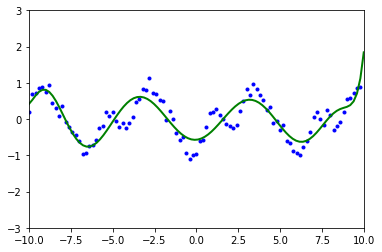

MSE with degree 10 = 0.08693451392576644
MAE with degree 10 = 0.2414068652800407
                0
MSE      0.137986
Bias     0.117949
Varians  0.020037


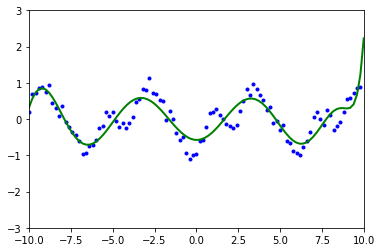

MSE with degree 11 = 0.08520221361884568
MAE with degree 11 = 0.236223378196998
                0
MSE      0.135023
Bias     0.110598
Varians  0.024426


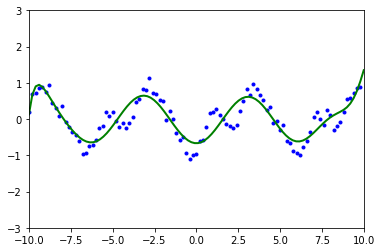

MSE with degree 12 = 0.07871871519798927
MAE with degree 12 = 0.22325735444718606
                0
MSE      0.130516
Bias     0.107821
Varians  0.022695


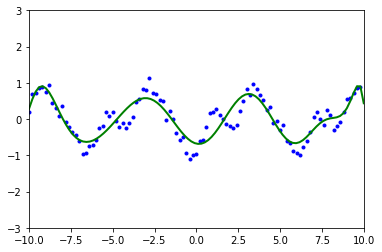

MSE with degree 13 = 0.07375937559771562
MAE with degree 13 = 0.21272710279782486
                0
MSE      0.123021
Bias     0.102051
Varians  0.020970


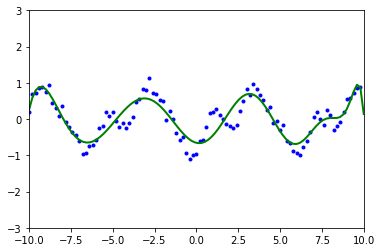

MSE with degree 14 = 0.07339078366363182
MAE with degree 14 = 0.2108837647256977
                0
MSE      0.139344
Bias     0.101244
Varians  0.038100


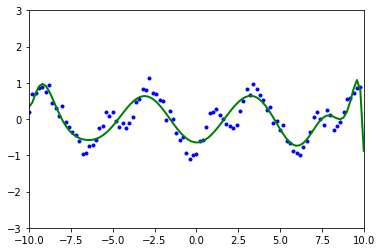

MSE with degree 15 = 0.07040235477866466
MAE with degree 15 = 0.21145370557355941
                0
MSE      0.135531
Bias     0.081858
Varians  0.053673


In [66]:
for i in range(1,16) :
     polynomial_reg(x,y_noisy_norm,i)

<b>best degree is 15</b>

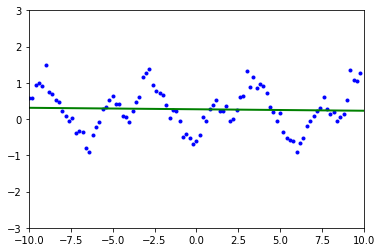

MSE with degree 1 = 0.31164586099240915
MAE with degree 1 = 0.4450983489526893
                0
MSE      0.461378
Bias     0.455344
Varians  0.006034


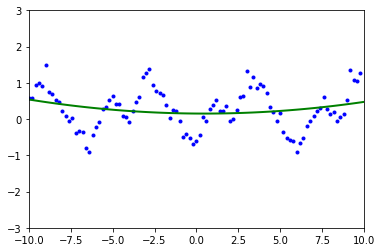

MSE with degree 2 = 0.3004973477063117
MAE with degree 2 = 0.4400050555784258
                0
MSE      0.548716
Bias     0.542444
Varians  0.006272


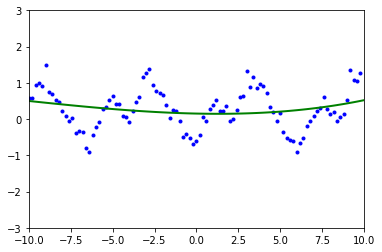

MSE with degree 3 = 0.30022663081829615
MAE with degree 3 = 0.44065382415770527
                0
MSE      0.552799
Bias     0.543432
Varians  0.009367


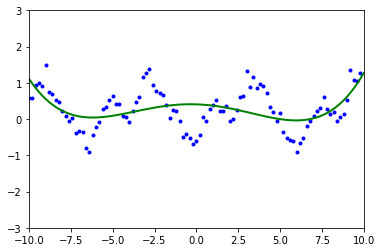

MSE with degree 4 = 0.24896950423026498
MAE with degree 4 = 0.3962879591787487
                0
MSE      0.426385
Bias     0.415585
Varians  0.010800


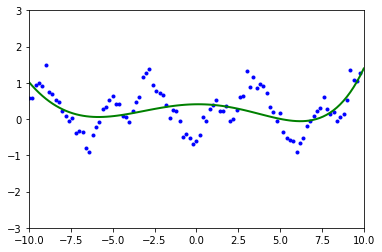

MSE with degree 5 = 0.2479239199843103
MAE with degree 5 = 0.395012620153442
                0
MSE      0.428933
Bias     0.414708
Varians  0.014225


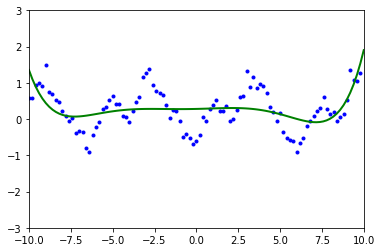

MSE with degree 6 = 0.23492810264148192
MAE with degree 6 = 0.3873912115640154
                0
MSE      0.400161
Bias     0.384049
Varians  0.016112


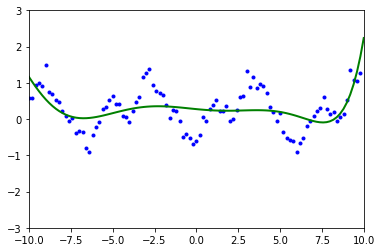

MSE with degree 7 = 0.2306688026855525
MAE with degree 7 = 0.3832817629800913
                0
MSE      0.420552
Bias     0.397973
Varians  0.022579


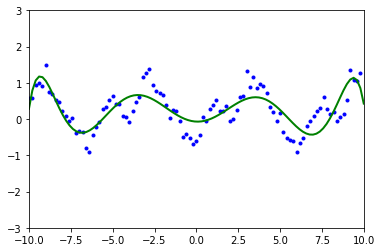

MSE with degree 8 = 0.13697695071768934
MAE with degree 8 = 0.3036417913871605
                0
MSE      0.259219
Bias     0.234247
Varians  0.024972


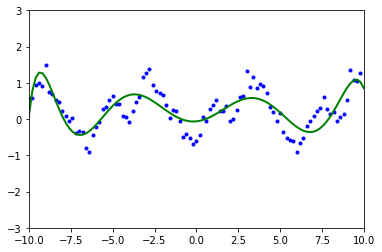

MSE with degree 9 = 0.13308571318229107
MAE with degree 9 = 0.3027482355036834
                0
MSE      0.256553
Bias     0.229052
Varians  0.027501


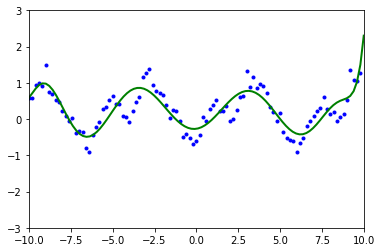

MSE with degree 10 = 0.09989934615257128
MAE with degree 10 = 0.25981722527183343
                0
MSE      0.198238
Bias     0.177488
Varians  0.020750


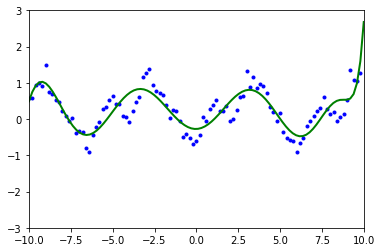

MSE with degree 11 = 0.0982563062182424
MAE with degree 11 = 0.25401153713669344
                0
MSE      0.191012
Bias     0.163389
Varians  0.027623


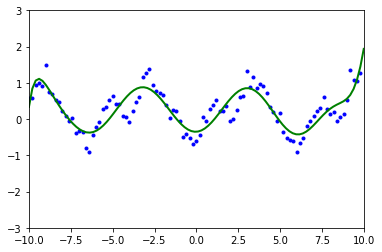

MSE with degree 12 = 0.09364597959114285
MAE with degree 12 = 0.24779849023351866
                0
MSE      0.185708
Bias     0.156760
Varians  0.028948


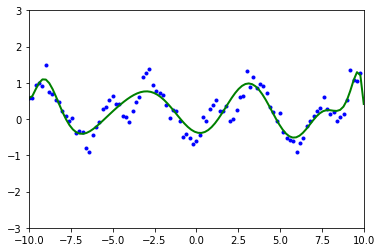

MSE with degree 13 = 0.07985366131962499
MAE with degree 13 = 0.2168725638654337
                0
MSE      0.158751
Bias     0.133205
Varians  0.025547


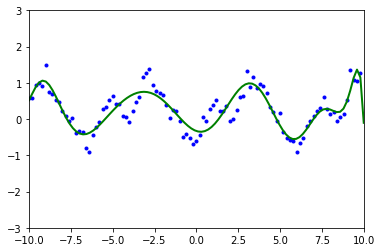

MSE with degree 14 = 0.07872226914602308
MAE with degree 14 = 0.21463675245144073
                0
MSE      0.167227
Bias     0.127791
Varians  0.039437


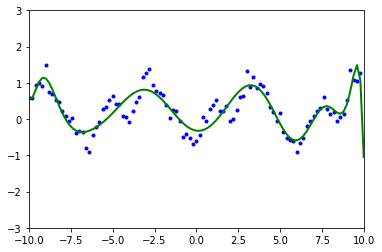

MSE with degree 15 = 0.07612519417506357
MAE with degree 15 = 0.21500170629372892
                0
MSE      0.169816
Bias     0.114587
Varians  0.055229


In [67]:
for i in range(1,16) :
     polynomial_reg(x,y_noisy_poiss,i)

<b>best degree is 15</b>